# Packages Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import norm
from scipy.stats import kendalltau
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB

import keras
from keras.models import Sequential
from keras.layers import Dense

# Data Loading

In [2]:
# Loading application records into a pandas dataframe
appl_df = pd.read_csv( 'application_record.csv', index_col= 'ID' )
appl_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
# Loading credit records into a pandas dataframe
cred_df = pd.read_csv('credit_record.csv')
cred_df.set_index('ID',inplace=True)

In [4]:
appl_df.head().T

ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-12005,-12005,-21474,-19110,-19110


In [5]:
cred_df.head().T

ID,5001711,5001711,5001711,5001711,5001712
MONTHS_BALANCE,0,-1,-2,-3,0
STATUS,X,0,0,0,C


In [6]:
print( appl_df.shape )
print('')
appl_df.info()

(438557, 17)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 5008804 to 6842885
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_MOBIL           438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 

In [7]:
print( cred_df.shape )
print('')
cred_df.info()

(1048575, 2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 5001711 to 5150487
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   MONTHS_BALANCE  1048575 non-null  int64 
 1   STATUS          1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.0+ MB


# Data Cleaning

## Removing duplicated data
In appl_df, althought there are different customer ID's, there is equal information over some disticnt ID values.  
An example of this is the customers with ID's 5008804 and 5008805:

In [8]:
appl_df.loc[[5008804, 5008805]].T

ID,5008804,5008805
CODE_GENDER,M,M
FLAG_OWN_CAR,Y,Y
FLAG_OWN_REALTY,Y,Y
CNT_CHILDREN,0,0
AMT_INCOME_TOTAL,427500,427500
NAME_INCOME_TYPE,Working,Working
NAME_EDUCATION_TYPE,Higher education,Higher education
NAME_FAMILY_STATUS,Civil marriage,Civil marriage
NAME_HOUSING_TYPE,Rented apartment,Rented apartment
DAYS_BIRTH,-12005,-12005


Using drop_duplicates in this case it's not possible, since there might be cases where one duplicate ID in application dataset might not be duplicated in credit records dataset.  
So we need to account ID's common to both dataframes 


In [9]:
valid_indexes = list( set(appl_df.index).intersection(set(cred_df.index)) ) 
len( valid_indexes )

36457

Filtering both dataframes by common indexes

In [10]:
#appl_df_clean =  appl_df.loc[valid_indexes]
#cred_df_clean = cred_df.loc[valid_indexes]

appl_df = appl_df.loc[valid_indexes]
cred_df = cred_df.loc[valid_indexes]

In [11]:
print(appl_df.shape)
print('')
appl_df.head().T

(36457, 17)



ID,5112591,5112592,5112593,5112594,5112597
CODE_GENDER,F,F,F,F,F
FLAG_OWN_CAR,N,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,103500,103500,103500,103500,103500
NAME_INCOME_TYPE,Working,Working,Working,Working,Working
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Married,Married,Married,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment
DAYS_BIRTH,-22466,-22466,-22466,-22466,-22466


Adding a unique customer ID in appl_df

In [12]:
appl_df_clean = appl_df.sort_values(by = appl_df.columns.to_list()) #safety step - performance doesen't seem to be affected that much.
grouped_cust = appl_df.sum(axis=1).map(hash).reset_index().rename(columns={0:'customer_id'})

id_counts_df = pd.DataFrame( grouped_cust.groupby('customer_id').size().sort_values(ascending=False), columns = ['id_count'] )
appl_df_clean['cust_id'] = appl_df.sum(axis=1).map(hash)

Adding the same unique customer ID to cred_df

In [13]:
grouped_cust = grouped_cust.set_index('ID')
cred_df_trsf = cred_df.merge(grouped_cust, how = 'inner', on = 'ID').reset_index()[['customer_id','ID', 'MONTHS_BALANCE', 'STATUS']]

cred_df_g = cred_df_trsf.sort_values(by=['customer_id', 'ID', 'MONTHS_BALANCE'], ascending = [True, True, False]).reset_index(drop=True)
cred_df_g['interaction_ID'] = cred_df_g.groupby(['customer_id','ID'], sort = False).ngroup().add(1) # not woring as I wanted, but it's good enough for what needs to be done
cred_df_g.drop(columns = ['ID'], inplace=True)
cred_df_g = cred_df_g[['customer_id', 'interaction_ID', 'MONTHS_BALANCE', 'STATUS']]
cred_df_g.head()

,customer_id,interaction_ID,MONTHS_BALANCE,STATUS
0,6009,1,0,X
1,6009,1,-1,X
2,6009,1,-2,X
3,6009,1,-3,X
4,6009,1,-4,X


Transforming cred_df in order to return a list of customers labeled by theyr behaviour type.  
This will help with getting our Y label

In [14]:
cred_df_g['month_behav'] = np.where( cred_df_g.STATUS.isin(['2','3','4','5']), 'b', 'g' )

cust_beh = pd.DataFrame( round( cred_df_g.groupby(['customer_id', 'month_behav']).size() / cred_df_g.groupby(['customer_id']).size() * 100, 2), columns = ['behav_kpi']).reset_index().set_index('customer_id')
print(cust_beh.head())
bad_cust = \
cust_beh[
    ( (cust_beh.month_behav=='g') & (cust_beh.behav_kpi <= 95) ) | 
    ( (cust_beh.month_behav=='b') & (cust_beh.groupby('customer_id').size()==1) )
        ]
bad_cust['customer_type'] = 'bad'
bad_cust.drop(columns=['month_behav', 'behav_kpi'], inplace=True)

good_cust = \
    cust_beh[
        ( (cust_beh.month_behav=='g') & (cust_beh.behav_kpi > 95) ) | 
        ( (cust_beh.month_behav=='g') & (cust_beh.groupby('customer_id').size()==1) )
            ]
good_cust['customer_type'] = 'good'
good_cust.drop(columns=['month_behav', 'behav_kpi'], inplace=True)

cred_df_clean = pd.concat([bad_cust, good_cust])
cred_df_clean['months_in_book'] = cred_df_g.groupby('customer_id').size()
cred_df_clean['contracts_nr'] = cred_df_g.groupby(['customer_id'])['interaction_ID'].nunique()

            month_behav  behav_kpi
customer_id                       
6009                  g      100.0
6553                  g      100.0
7068                  g      100.0
7566                  g      100.0
11709                 g      100.0


C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

## Checking and Cleaning Missing Data

In [15]:
# Checking how many values are missing in credit records dataset
cred_df_clean.isnull().sum()

customer_type     0
months_in_book    0
contracts_nr      0
dtype: int64

In [16]:
# Checking how many values are missing in application dataset
appl_df_clean.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
cust_id                    0
dtype: int64

This means we only need to clean missing data in application dataset -> Ocupation_type column.  

In [17]:
appl_df_clean.OCCUPATION_TYPE.unique()

array(['Managers', nan, 'Core staff', 'Cleaning staff', 'Medicine staff',
       'Accountants', 'Sales staff', 'Laborers', 'Security staff',
       'High skill tech staff', 'Cooking staff', 'Secretaries', 'Drivers',
       'Private service staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'HR staff', 'IT staff', 'Realty agents'],
      dtype=object)

replace the missing values by 'Not Available'.

In [18]:
appl_df_clean['OCCUPATION_TYPE'] = appl_df_clean['OCCUPATION_TYPE'].fillna('Not Available')

## Reclassifying some Flags
In application dataset there are 2 flag columns that have Y/N labels, while other flags in this dataset are binary variables.   
For congruence, let's pass those Y/N labels into 1 and 0's, respectively. 

In [19]:
dic = {
    'Y' : 1,
    'N' : 0
}

appl_df_clean['FLAG_OWN_CAR'] = appl_df_clean['FLAG_OWN_CAR'].replace(dic)
appl_df_clean['FLAG_OWN_REALTY'] = appl_df_clean['FLAG_OWN_REALTY'].replace(dic)

appl_df_clean.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cust_id
ID,,,,,,,,,,,,,,,,,,
5126174,F,0,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,7068
5126175,F,0,0,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,7068
5054382,F,0,0,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20836,365243,1,0,0,0,Not Available,2.0,375910
5132319,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Not Available,2.0,378941
5132320,F,0,0,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,365243,1,0,0,0,Not Available,2.0,378941


In [20]:
flag_cols = [x for x in appl_df_clean.columns if x.startswith('FLAG_')]                                                          
cat_cols  = [x for x in appl_df_clean.columns if x.startswith('CODE_') or x.startswith('NAME_') or x.startswith('OCCUPATION_') ] 
num_cols  = [x for x in appl_df_clean.columns if x.startswith('CNT_')] + [x for x in appl_df_clean.columns if x.startswith('AMT_') or x.startswith('DAYS_')]          

#checkzone:
# 
# +1 accounts for cust_id column who does not fit in any column category because it's a "dummy" column just to join with cred_df later on
#
len(flag_cols) + len( cat_cols ) + len( num_cols ) + 1 == len( appl_df_clean.columns )  

True

In [21]:
appl_df_clean = appl_df_clean[flag_cols + cat_cols + num_cols + ['cust_id']]

appl_df_clean.head().T

ID,5126174,5126175,5054382,5132319,5132320
FLAG_OWN_CAR,0,0,0,0,0
FLAG_OWN_REALTY,0,0,0,0,0
FLAG_MOBIL,1,1,1,1,1
FLAG_WORK_PHONE,1,1,0,0,0
FLAG_PHONE,0,0,0,0,0
FLAG_EMAIL,0,0,0,0,0
CODE_GENDER,F,F,F,F,F
NAME_INCOME_TYPE,Working,Working,Pensioner,Pensioner,Pensioner
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Married,Married


## Joining application records dataset with customer labels dataset

In [22]:
cred_df_clean.reset_index(inplace=True)

df = \
appl_df_clean.reset_index().merge(
    cred_df_clean,
    left_on = appl_df_clean.cust_id,
    right_on = cred_df_clean.customer_id,
    how = 'inner'
).drop(columns = ['key_0','cust_id', 'customer_id']).set_index('ID')

df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,customer_type,months_in_book,contracts_nr
ID,,,,,,,,,,,,,,,,,,,,
5126174,0,0,1,1,0,0,F,Working,Higher education,Civil marriage,House / apartment,Managers,0,2.0,27000.0,-14869,-5067,good,49,2
5126175,0,0,1,1,0,0,F,Working,Higher education,Civil marriage,House / apartment,Managers,0,2.0,27000.0,-14869,-5067,good,49,2
5054382,0,0,1,0,0,0,F,Pensioner,Secondary / secondary special,Married,House / apartment,Not Available,0,2.0,31500.0,-20836,365243,good,13,1
5132319,0,0,1,0,0,0,F,Pensioner,Secondary / secondary special,Married,Office apartment,Not Available,0,2.0,33300.0,-19605,365243,good,276,8
5132320,0,0,1,0,0,0,F,Pensioner,Secondary / secondary special,Married,Office apartment,Not Available,0,2.0,33300.0,-19605,365243,good,276,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135540,1,1,1,0,0,0,M,Working,Secondary / secondary special,Married,Co-op apartment,Managers,5,7.0,202500.0,-11384,-2727,good,121,8
5135541,1,1,1,0,0,0,M,Working,Secondary / secondary special,Married,Co-op apartment,Managers,5,7.0,202500.0,-11384,-2727,good,121,8
5061207,1,1,1,0,0,0,M,Working,Secondary / secondary special,Separated,House / apartment,Drivers,14,15.0,225000.0,-17754,-1689,good,111,3


# Descriptive Analytics

Now that we have our datasets cleaned we can prepare some descriptive analytics about them

## Applications Dataset

### Flag features distributions

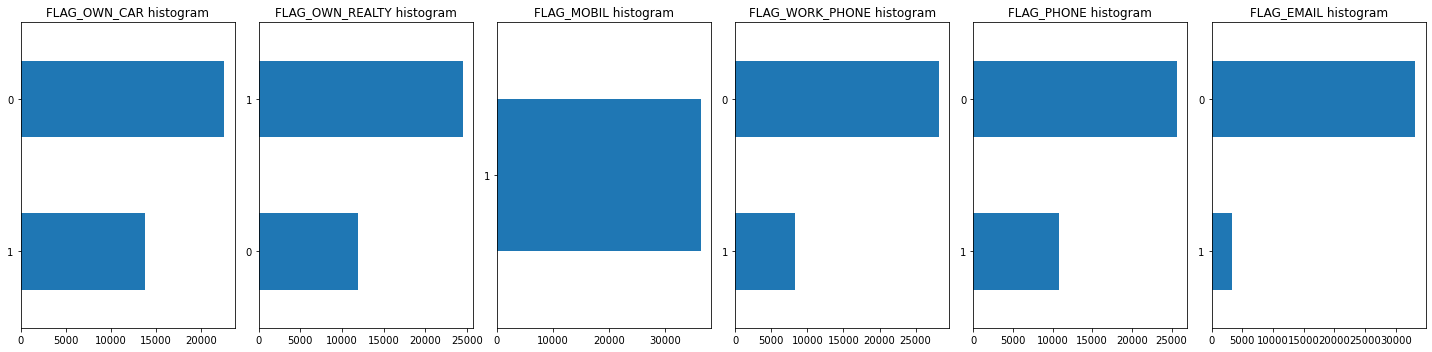

In [23]:
fig, axes = plt.subplots(ncols=len( flag_cols ), figsize=(20,5))
for col, ax in zip(df[flag_cols], axes):
    df[col].value_counts().sort_values().plot.barh(ax=ax, title=col + ' histogram')

plt.tight_layout()    
plt.show()

From the above chart sequence we can imediatly see that all the customers, recorded in the application dataset, have a mobile phone.  
This fact implies that it is irrelevant to use this feature for deault modeling, since it won't help to find differences amongst customers.  

Other fact to note, is that in every flag feature, except FLAG_MOBIL, there is a notable difference between customers who have the caracteristic and the ones who don't.  

In [24]:
#removing FLAG_MOBIL from the app_df_clean dataset since it holds no value for this study
df.drop(columns=['FLAG_MOBIL'], inplace=True)
#removing FLAG_MOBIL from flag_cols aswell
flag_cols.remove('FLAG_MOBIL')

df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,customer_type,months_in_book,contracts_nr
ID,,,,,,,,,,,,,,,,,,,
5126174,0,0,1,0,0,F,Working,Higher education,Civil marriage,House / apartment,Managers,0,2.0,27000.0,-14869,-5067,good,49,2
5126175,0,0,1,0,0,F,Working,Higher education,Civil marriage,House / apartment,Managers,0,2.0,27000.0,-14869,-5067,good,49,2
5054382,0,0,0,0,0,F,Pensioner,Secondary / secondary special,Married,House / apartment,Not Available,0,2.0,31500.0,-20836,365243,good,13,1
5132319,0,0,0,0,0,F,Pensioner,Secondary / secondary special,Married,Office apartment,Not Available,0,2.0,33300.0,-19605,365243,good,276,8
5132320,0,0,0,0,0,F,Pensioner,Secondary / secondary special,Married,Office apartment,Not Available,0,2.0,33300.0,-19605,365243,good,276,8


### Categorical Features Distributions

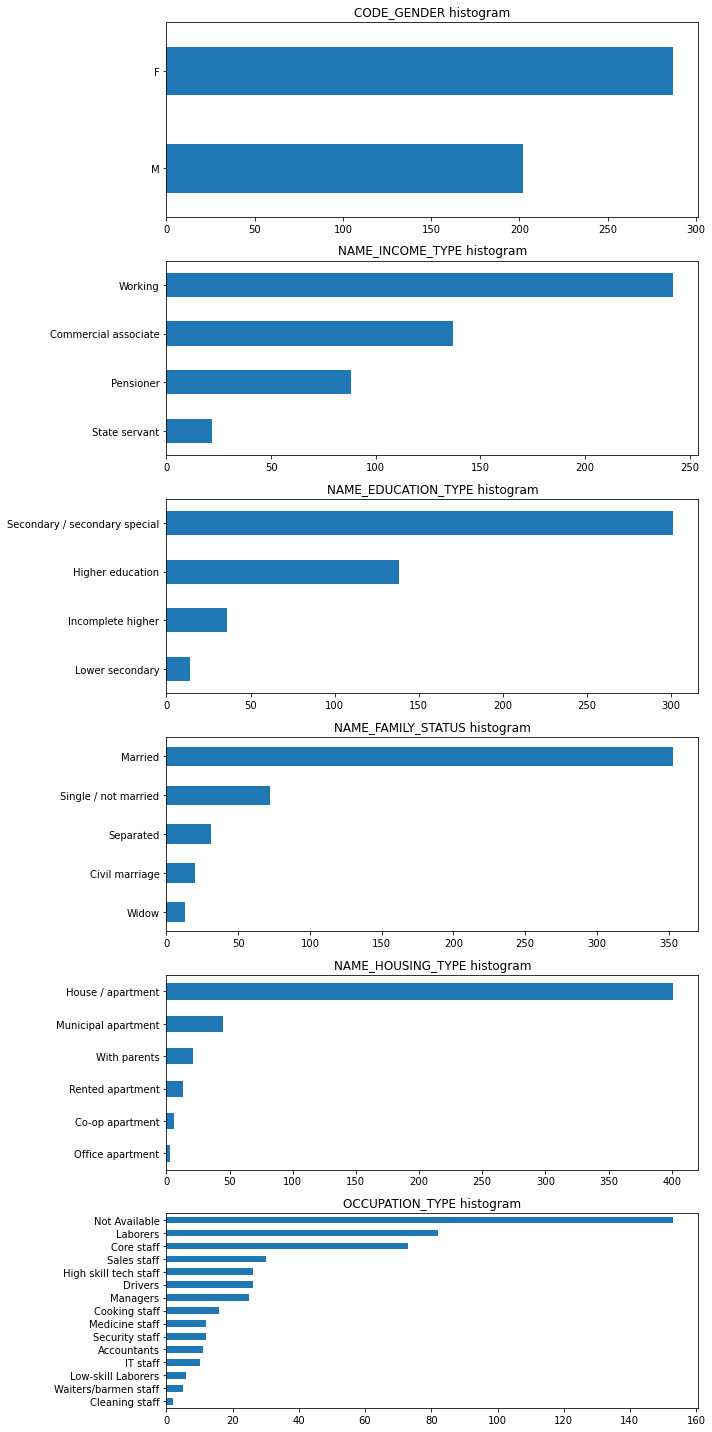

In [25]:
fig, axes = plt.subplots( nrows= len(cat_cols),  figsize=(10,20))
for col, ax in zip(df[cat_cols], axes):
    df[df['customer_type']=="bad"][col].value_counts().sort_values().plot.barh(ax=ax, title=col + ' histogram')

plt.tight_layout()    
plt.show()

From the above charts we can immediately notice that there are notable differences in all categorical features.  


### Numeric Features Distributions

In [26]:
num_cols = num_cols + ['months_in_book', 'contracts_nr']

C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

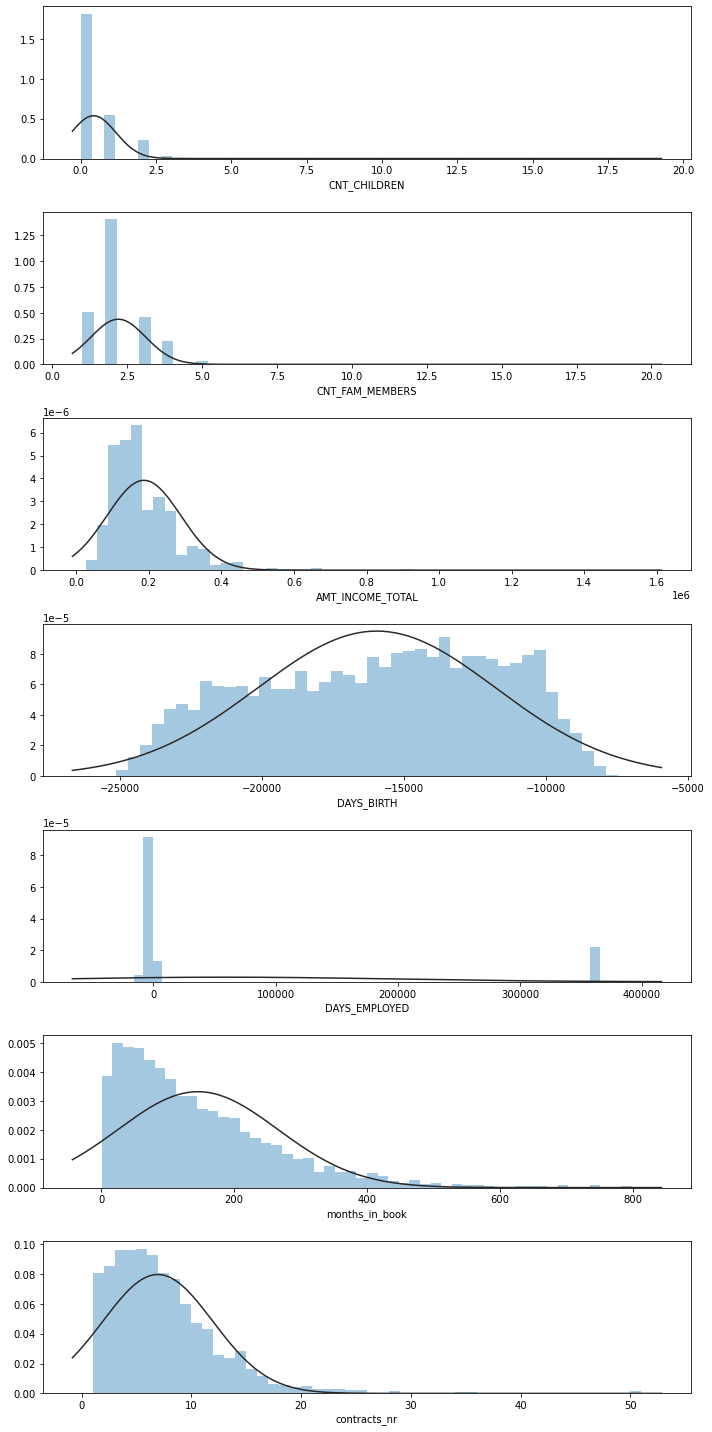

''

In [27]:
fig, axes = plt.subplots( nrows= len(num_cols), figsize=(10,20))

for col, ax in zip(df[num_cols], axes):
    sns.distplot( df[col],ax=ax ,kde = False, fit=norm)

plt.tight_layout()    
plt.show()
;

Analysing the numeric features distribution plots, we can imediatly see that all of this features are assimetric over the lower values, except DAYS_BITH.  
  
This says alot about the majority of the profiles:  
Most customers have:   
- none or few children,  
- have small families,  
- have low incomes,  
- have about 43 years old  
- are emplyoed for not too long, although there is a significant proportion who are unemployed (those positive days are way too high!!! ) 


From here we can also see that we, probably, will have serious problems with outliers lying in the data.  

### Numeric features | Outliers detection

In [28]:
desc_num = round( df[num_cols].describe(), 0)
desc_num    

,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,months_in_book,contracts_nr
count,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0
mean,0.0,2.0,186686.0,-15975.0,59263.0,146.0,7.0
std,1.0,1.0,101789.0,4201.0,137651.0,120.0,5.0
min,0.0,1.0,27000.0,-25152.0,-15713.0,1.0,1.0
25%,0.0,2.0,121500.0,-19438.0,-3153.0,54.0,3.0
50%,0.0,2.0,157500.0,-15563.0,-1552.0,114.0,6.0
75%,1.0,3.0,225000.0,-12462.0,-408.0,206.0,9.0
max,19.0,20.0,1575000.0,-7489.0,365243.0,799.0,51.0


  
365,243 days unemployed translates into about 1001 years unemployed! (according to data dic, positive values for this feature mean the person is unemployed)  
This is impossible 
  
Actually, if we filter app_df_clean by positive values in DAYS_EMPLOYED and check the minimum value for the resulting DAYS_EMPLOYED sample, we get 365243 days  
which means that all of the positive values in app_df_clean are, most defenetly, wrongly registered.  


In [29]:
df[df.DAYS_EMPLOYED > 0 ]['DAYS_EMPLOYED'].min()

365243

In [30]:
appl_df[appl_df.DAYS_EMPLOYED > 0 ]['DAYS_EMPLOYED'].min()

365243

 This leave us with no idea for how long people are unemployed 

checking who are the customers who have that much time unemployed...

In [31]:
appl_df_unem = df[appl_df_clean.DAYS_EMPLOYED > 0 ]
appl_df_unem.head().T

C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ID,5054382,5132319,5132320,5132321,5132322
FLAG_OWN_CAR,0,0,0,0,0
FLAG_OWN_REALTY,0,0,0,0,0
FLAG_WORK_PHONE,0,0,0,0,0
FLAG_PHONE,0,0,0,0,0
FLAG_EMAIL,0,0,0,0,0
CODE_GENDER,F,F,F,F,F
NAME_INCOME_TYPE,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Married,Married,Married,Married
NAME_HOUSING_TYPE,House / apartment,Office apartment,Office apartment,Office apartment,Office apartment


Seems like they are mostly pensionists...  
Let's confirm that fact:

In [32]:
print( appl_df_unem['NAME_INCOME_TYPE'].unique() )
print('')
print( appl_df_unem['OCCUPATION_TYPE'].unique() )

['Pensioner']

['Not Available']


In [33]:
print( appl_df[appl_df.DAYS_EMPLOYED == 365243]['NAME_INCOME_TYPE'].unique() )
print('')
print(appl_df[appl_df.DAYS_EMPLOYED == 365243]['OCCUPATION_TYPE'].unique())

['Pensioner']

[nan]


So... this lead us to conclude that whoever built this dataframe, used 365,243 days figure to register pensionists who have no occupation.  
Our model will need to understand that people are not employed (and neither they are employed) because they are already pensionists.

In [34]:
df[df['customer_type']=='bad'].describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,months_in_book,contracts_nr
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.359918,0.638037,0.249489,0.316973,0.104294,0.443763,2.218814,188531.944785,-15738.204499,58036.241309,125.605317,5.548057
std,0.480468,0.481060,0.433160,0.465773,0.305955,0.650825,0.843960,109834.713123,4328.156167,136021.174147,93.110137,4.412891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36000.000000,-24611.000000,-12827.000000,3.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,112500.000000,-18907.000000,-2218.000000,55.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,157500.000000,-15645.000000,-925.000000,103.000000,4.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,225000.000000,-11998.000000,-346.000000,172.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,675000.000000,-8168.000000,365243.000000,400.000000,20.000000


In [35]:
df[df['customer_type']=='good'].describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,months_in_book,contracts_nr
count,35968.000000,35968.000000,35968.00000,35968.000000,35968.000000,35968.000000,35968.000000,3.596800e+04,35968.000000,35968.000000,35968.000000,35968.000000
mean,0.379977,0.672653,0.22520,0.294512,0.089524,0.430132,2.198176,1.866606e+05,-15978.395073,59279.612989,146.090775,6.961855
std,0.485387,0.469251,0.41772,0.455829,0.285503,0.743540,0.912580,1.016769e+05,4198.758186,137675.158093,120.548681,5.018485
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,1.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.215000e+05,-19441.000000,-3154.000000,54.000000,3.000000
50%,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.575000e+05,-15563.000000,-1557.000000,115.000000,6.000000
75%,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,3.000000,2.250000e+05,-12477.000000,-408.000000,206.000000,9.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,20.000000,1.575000e+06,-7489.000000,365243.000000,799.000000,51.000000


Let's plot some box-whiskers plots in ordert o see better the outliers in our data samples

C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\amitb\anaconda3\envs\hello\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single

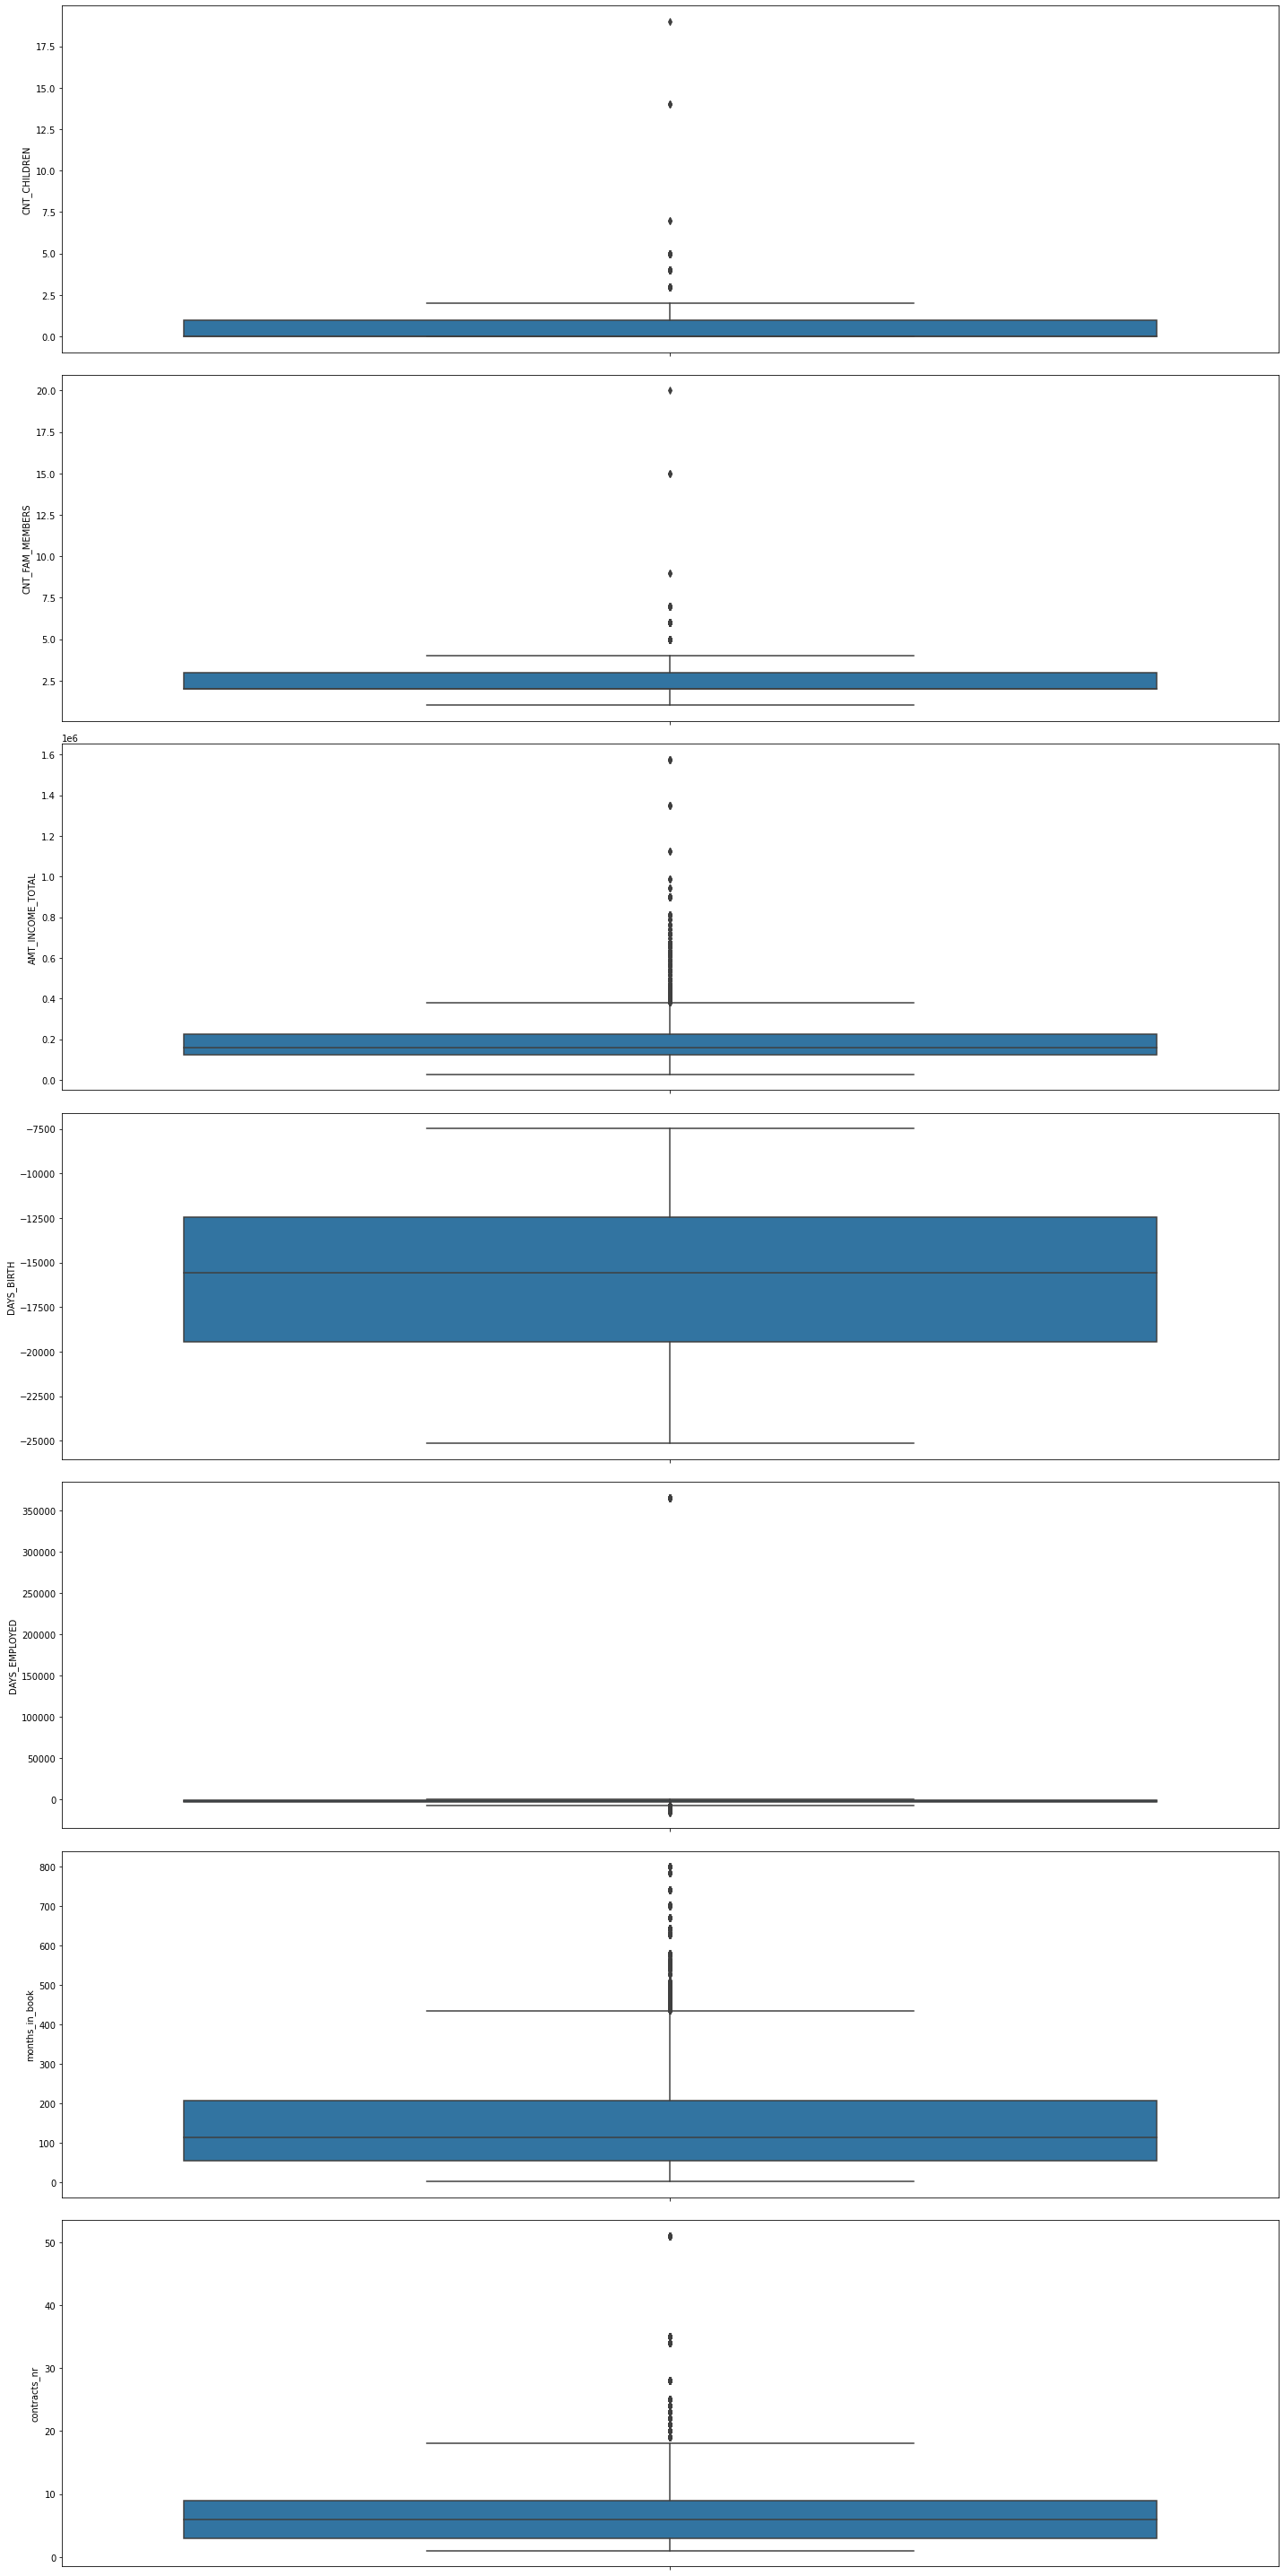

In [36]:
fig, axes = plt.subplots( nrows= len(num_cols), figsize=(20,40))

for col, ax in zip(df[num_cols], axes):
    sns.boxplot( y = df[col], ax=ax, orient = 'h' )

plt.tight_layout()    
plt.show()

Results - 
there are alot of outliers in most of numeric features of our dataset  



### Testing the "Normality" of DAYS_BIRTH feature - to get whether we can use pearson correlation or not(that is whether this plot is statistical or not)  

In [37]:
#Normality Test
stat, p = normaltest(df['DAYS_BIRTH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=10997.940, p=0.000
Sample does not look Gaussian (reject H0)


Safe to conclude that DAYS_BIRTH feature is not coming from a purely Gaussian/Normal probability distribution. 

### Numeric Feature correlations

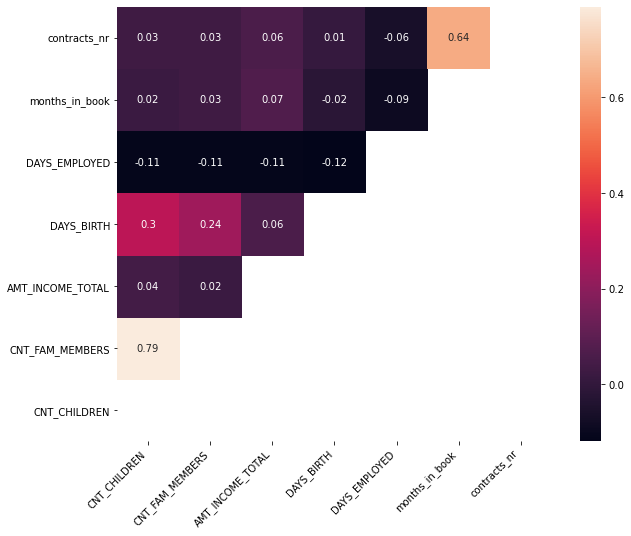

''

In [38]:
appl_corr = round(df[num_cols].corr('kendall'), 2)

plt.figure(figsize=(10, 8))

mask = np.zeros_like(appl_corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
    appl_corr, 
    annot=True, 
    square=True,
    mask=mask,
    xticklabels=True, 
    yticklabels=True    
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim([0,7])
plt.show()
;

The follwing attributes have strong relationships: 
* CNT_FAM_MEMBERS and CNT_CHILDREN,   

   

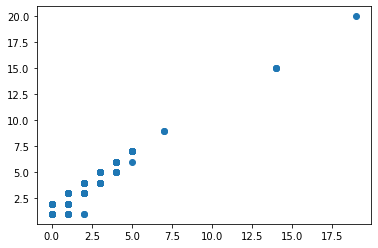

In [39]:
plt.scatter(df['CNT_CHILDREN'], df['CNT_FAM_MEMBERS']);

We'll drop CNT_CHILDREN or CNT_FAM_MEMBERS given the high correlations

In [40]:
num_cols.remove('CNT_CHILDREN')
num_cols.remove('contracts_nr')
df.drop(columns=['CNT_CHILDREN','contracts_nr'], inplace = True)
df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,customer_type,months_in_book
ID,,,,,,,,,,,,,,,,,
5126174,0,0,1,0,0,F,Working,Higher education,Civil marriage,House / apartment,Managers,2.0,27000.0,-14869,-5067,good,49
5126175,0,0,1,0,0,F,Working,Higher education,Civil marriage,House / apartment,Managers,2.0,27000.0,-14869,-5067,good,49
5054382,0,0,0,0,0,F,Pensioner,Secondary / secondary special,Married,House / apartment,Not Available,2.0,31500.0,-20836,365243,good,13
5132319,0,0,0,0,0,F,Pensioner,Secondary / secondary special,Married,Office apartment,Not Available,2.0,33300.0,-19605,365243,good,276
5132320,0,0,0,0,0,F,Pensioner,Secondary / secondary special,Married,Office apartment,Not Available,2.0,33300.0,-19605,365243,good,276


## Credit Records Data Set

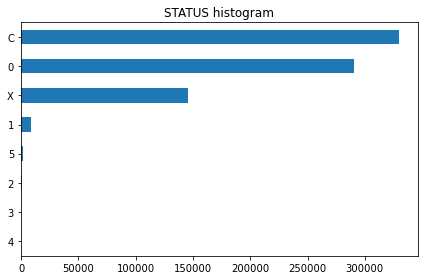

In [41]:
cred_df['STATUS'].value_counts().sort_values().plot.barh(title= 'STATUS histogram')

plt.tight_layout()    
plt.show()

From the plot we can see that most customers-
1.that have loans to pay on a given month
2.pay them on time with max 59 days overdue.  

However, there is a slight portion of them that either:  
1.have bad debts
2.pay within 60 or 149 days overdue.  

Those last ones can be classified as the 'Bad' customers, because if we think (as a bank) of not receiveing the due amounts for more then 60 days it will have a very negative impact for bank.

Below dataframe give us the customers labeled as 'good' or 'bad' based on classification done previously

In [42]:
cred_df_clean.head()

,customer_id,customer_type,months_in_book,contracts_nr
0,21045,bad,53,1
1,44511,bad,63,3
2,48052,bad,20,3
3,52309,bad,3,1
4,52833,bad,74,2


Percentage of bad clients in the data:

In [43]:
percent_bad_customers = 100 * len( cred_df_clean[cred_df_clean.customer_type=='bad'] ) / cred_df_clean.shape[0] 

print( "{0:.3f}%".format( percent_bad_customers) )

1.675%


In [44]:
#example of a "bad" customer
customer_id = 5142361
print( appl_df_clean.loc[customer_id] )
print('')
print( cred_df.loc[customer_id].sort_values(by=['MONTHS_BALANCE'], ascending=False) )

FLAG_OWN_CAR                                       1
FLAG_OWN_REALTY                                    1
FLAG_MOBIL                                         1
FLAG_WORK_PHONE                                    1
FLAG_PHONE                                         1
FLAG_EMAIL                                         0
CODE_GENDER                                        M
NAME_INCOME_TYPE                             Working
NAME_EDUCATION_TYPE    Secondary / secondary special
NAME_FAMILY_STATUS                           Married
NAME_HOUSING_TYPE                  House / apartment
OCCUPATION_TYPE                              Drivers
CNT_CHILDREN                                       1
CNT_FAM_MEMBERS                                    3
AMT_INCOME_TOTAL                              112500
DAYS_BIRTH                                    -16204
DAYS_EMPLOYED                                   -925
cust_id                                        95378
Name: 5142361, dtype: object

         MONTHS_

## Shortening Categorical Feature Classes

In [45]:
cat_cols

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [46]:
# Variable list to transform
cat_col_t = [ col for col in cat_cols if 'GENDER' not in col ] # we exclude gender as it only contains 2 categories
cat_col_t

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

### NAME_INCOME_TYPE

In [47]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

Let's divide this variable as 'Working', 'Pensionioner' and 'Student', making 'State servant', 'Commercial associate' merge into 'Working' category. 

In [48]:
dic = {
    'Commercial associate' : 'Working',
    'State servant' : 'Working',
}
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace(dic)

### NAME_EDUCATION_TYPE

In [49]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

Let's divide this variable as 'Secondary / secondary special', 'Higher education' and 'Lower secondary'.

In [50]:
dic = {
    'Incomplete higher' : 'Secondary / secondary special',
    'Academic degree' : 'Higher education',
    'Lower secondary' : 'Basic'
}
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace(dic)

### NAME_FAMILY_STATUS

In [51]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [52]:
dic = {
    'Civil marriage' : 'Married'
}

#df['NAME_FAMILY_STATUS'].replace(dic).value_counts()
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace(dic)

### NAME_HOUSING_TYPE

In [53]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [54]:
dic = {
    'House / apartment' : 'Rented apartment',
    'Co-op apartment' : 'Rented apartment',
    'Municipal apartment': 'Municipal or Office apartment',
    'Office apartment': 'Municipal or Office apartment'
}

df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace(dic)

### OCCUPATION_TYPE

In [55]:
df['OCCUPATION_TYPE'].value_counts()

Not Available            11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

grouping professions type will be though without any grouping criteria.  
Let's try to group by income.  

''

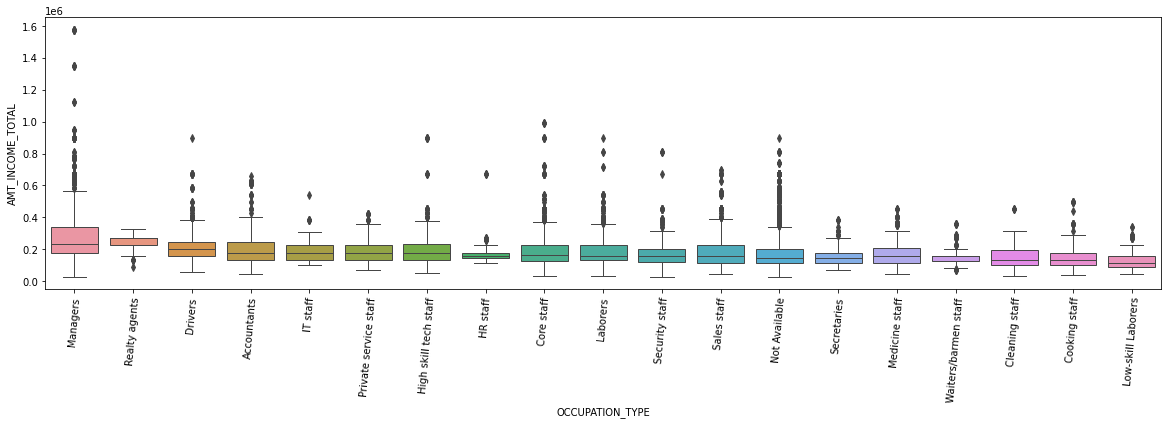

In [56]:

data = pd.DataFrame(df.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean()).reset_index().sort_values(by=['AMT_INCOME_TOTAL'], ascending=False)

plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df.sort_values(by='AMT_INCOME_TOTAL', ascending = False), x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', order = data['OCCUPATION_TYPE'], linewidth= 1)

ax.set_xticklabels(ax.get_xticklabels(),rotation=85)

#ax.set_xlim(0,20)
;

In [57]:
dic = {
    'Managers' : 'Group 1',
    'Realty agents' : 'Group 1',
    'Drivers' : 'Group 1',
    'Accountants' : 'Group 1',
    'IT staff' : 'Group 2',
    'Private service staff' : 'Group 2',
    'High skill tech staff' : 'Group 2',
    'HR staff' : 'Group 2',
    'Core staff' : 'Group 2',
    'Laborers' : 'Group 3',
    'Security staff' : 'Group 3',
    'Sales staff' : 'Group 3',
    'Not Available' : 'Group 3',
    'Secretaries' : 'Group 3',
    'Medicine staff' : 'Group 4',
    'Waiters/barmen staff' : 'Group 4',
    'Cleaning staff' : 'Group 4',
    'Cooking staff' : 'Group 4',
    'Low-skill Laborers' : 'Group 4'
}

#df['OCCUPATION_TYPE'].replace(dic)
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(dic)

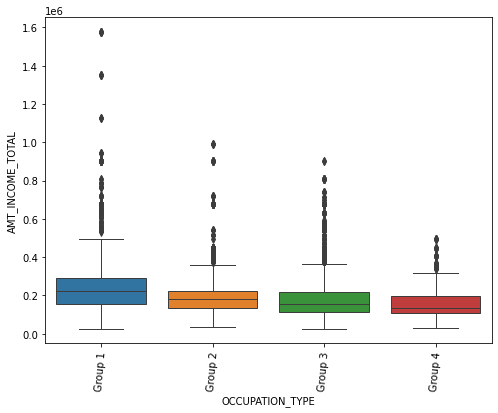

In [58]:
data = pd.DataFrame(df.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean()).reset_index().sort_values(by=['AMT_INCOME_TOTAL'], ascending=False).round(1)

plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df.sort_values(by='AMT_INCOME_TOTAL', ascending = False), x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', order = data['OCCUPATION_TYPE'], linewidth= 1)

ax.set_xticklabels(ax.get_xticklabels(),rotation=85);

# Data Pre Processing

In this section we are going to pre-process the dataset to feed the model.  
We will split features by theyr type first: flag (or binary), numeric and categorical, and in each of those splits we are doing train and test splits to guarantee that numeric features are not scaled/normalized before the train/test split operation.

## Encoding Categorical Features

In [59]:
df_cat = df[cat_cols]
df_dumm = pd.get_dummies(df_cat,  prefix_sep='==')

df_dumm.head()

,CODE_GENDER==F,CODE_GENDER==M,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,NAME_FAMILY_STATUS==Single / not married,NAME_FAMILY_STATUS==Widow,NAME_HOUSING_TYPE==Municipal or Office apartment,NAME_HOUSING_TYPE==Rented apartment,NAME_HOUSING_TYPE==With parents,OCCUPATION_TYPE==Group 1,OCCUPATION_TYPE==Group 2,OCCUPATION_TYPE==Group 3,OCCUPATION_TYPE==Group 4
ID,,,,,,,,,,,,,,,,,,,
5126174,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
5126175,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
5054382,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
5132319,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
5132320,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0


Dropping categorical columns from df dataframe, and joining the "dummy" versions

In [60]:
df.drop(columns = cat_cols, inplace= True)

In [61]:
df_dumm.head()

,CODE_GENDER==F,CODE_GENDER==M,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,NAME_FAMILY_STATUS==Single / not married,NAME_FAMILY_STATUS==Widow,NAME_HOUSING_TYPE==Municipal or Office apartment,NAME_HOUSING_TYPE==Rented apartment,NAME_HOUSING_TYPE==With parents,OCCUPATION_TYPE==Group 1,OCCUPATION_TYPE==Group 2,OCCUPATION_TYPE==Group 3,OCCUPATION_TYPE==Group 4
ID,,,,,,,,,,,,,,,,,,,
5126174,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
5126175,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
5054382,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
5132319,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
5132320,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0


In [62]:
df = pd.concat([df_dumm, df], axis = 1)
df.head()

,CODE_GENDER==F,CODE_GENDER==M,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,...,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,customer_type,months_in_book
ID,,,,,,,,,,,,,,,,,,,,,
5126174,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,2.0,27000.0,-14869,-5067,good,49
5126175,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,2.0,27000.0,-14869,-5067,good,49
5054382,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,2.0,31500.0,-20836,365243,good,13
5132319,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,2.0,33300.0,-19605,365243,good,276
5132320,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,2.0,33300.0,-19605,365243,good,276


## Setting Flag Features to same data type

In [63]:
df[flag_cols] = df[flag_cols].astype('uint8')
df.head()
df[num_cols].describe()

,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,months_in_book
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000
mean,2.198453,1.866857e+05,-15975.173382,59262.935568,145.816002
std,0.911686,1.017892e+05,4200.549944,137651.334859,120.244185
min,1.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000
25%,2.000000,1.215000e+05,-19438.000000,-3153.000000,54.000000
50%,2.000000,1.575000e+05,-15563.000000,-1552.000000,114.000000
75%,3.000000,2.250000e+05,-12462.000000,-408.000000,206.000000
max,20.000000,1.575000e+06,-7489.000000,365243.000000,799.000000


## Normalisation

In [64]:
df_num= df[num_cols].drop('DAYS_EMPLOYED',axis=1)

# perform a robust scaler transform of the dataset
trans = RobustScaler(with_centering=False, with_scaling=True)

df_num_s = trans.fit_transform(df_num)
df_num = pd.DataFrame( df_num_s, columns = df_num.columns, index = df.index)

#separate normalisation for unemployed days
employement = df['DAYS_EMPLOYED']
employement = [x/pow(10,4) if x<50000 else 1 for x in employement]

# for feeding into model
df.drop(columns = num_cols, inplace = True)
df = pd.concat([df, df_num,pd.DataFrame(employement,columns=["DAYS_EMPLOYED"],index=df.index)] ,axis=1)
df[num_cols].describe()

,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,months_in_book
count,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,2.198453,1.803727,-2.290019,-0.051751,0.959316
std,0.911686,0.983471,0.602143,0.519653,0.791080
min,1.000000,0.260870,-3.605505,-1.571300,0.006579
25%,2.000000,1.173913,-2.786411,-0.315300,0.355263
50%,2.000000,1.521739,-2.230935,-0.155200,0.750000
75%,3.000000,2.173913,-1.786411,-0.040800,1.355263
max,20.000000,15.217391,-1.073538,1.000000,5.256579


## Dealing with class imbalance using SMOTE

### First Oversampling then train test split or otherwise?

In [65]:
print(df['customer_type'].value_counts())

good    35968
bad       489
Name: customer_type, dtype: int64


In [66]:
# genrating target class
Y=df['customer_type']
Y=pd.Series([1 if z=='bad' else 0 for z in Y ],index=Y.index)
X=df.drop('customer_type',axis=1)
Y = Y.astype('int')

rand_st = 123
test_size =0.3

# splitting into test and train
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = test_size, stratify = Y, random_state = rand_st )
print(Y_train.value_counts())
X_train,Y_train = SMOTE().fit_sample(X_train,Y_train)
X_train = pd.DataFrame(X_train, columns = X.columns)

print(Y_train.value_counts())

0    25177
1      342
dtype: int64
1    25177
0    25177
dtype: int64


In [67]:
X_train.describe()

,CODE_GENDER==F,CODE_GENDER==M,NAME_INCOME_TYPE==Pensioner,NAME_INCOME_TYPE==Student,NAME_INCOME_TYPE==Working,NAME_EDUCATION_TYPE==Basic,NAME_EDUCATION_TYPE==Higher education,NAME_EDUCATION_TYPE==Secondary / secondary special,NAME_FAMILY_STATUS==Married,NAME_FAMILY_STATUS==Separated,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,months_in_book,DAYS_EMPLOYED
count,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,...,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000,50354.000000
mean,0.613397,0.360964,0.166759,0.000199,0.824403,0.016364,0.257259,0.691325,0.765222,0.048238,...,0.333936,0.622910,0.204572,0.274060,0.091393,2.210304,1.819728,-2.275502,0.905680,-0.026502
std,0.486976,0.480285,0.372765,0.014091,0.380481,0.126873,0.437127,0.461951,0.423864,0.214272,...,0.471622,0.484663,0.403392,0.446044,0.288170,0.843645,0.993512,0.597693,0.715613,0.498393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.260870,-3.605505,0.006579,-1.571300
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.130435,-2.713159,0.379306,-0.262500
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.521739,-2.221760,0.684211,-0.134100
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.173913,-1.785264,1.263158,-0.046400
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,15.217391,-1.107081,5.256579,1.000000


# Modelling and results

#### Our data set is highly imbalabced. Hence, accuracy is not the correct performance measure for our model.
#### Precision or recall measures are used depeding upon the situation of the bank
#### There is usually a trade-off between precision and recall
#### A bank having plethora of customers will prefer a higher recall model while a bank with less number of customers will go for higher precision model
#### F1 score which is harmonic mean of precision and recall is used for overall model quality assesment
### Below models are listed by increasing F1 score

## Naive Bayes

In [68]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [69]:
Y_predict = model.predict(X_test)
train_predict = model.predict(X_train)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_predict)))
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_train, train_predict)))

Accuracy Score is 0.11657
Accuracy Score is 0.53477


<AxesSubplot:>

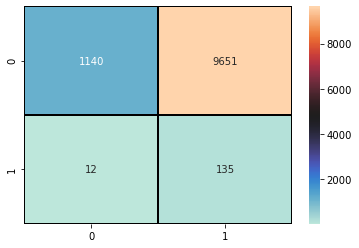

In [70]:
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm,annot=True,fmt='g',cmap="icefire", linewidths=1, linecolor='black')

In [71]:
print(classification_report(Y_test, Y_predict))
print(classification_report(Y_train, train_predict))

              precision    recall  f1-score   support

           0       0.99      0.11      0.19     10791
           1       0.01      0.92      0.03       147

    accuracy                           0.12     10938
   macro avg       0.50      0.51      0.11     10938
weighted avg       0.98      0.12      0.19     10938

              precision    recall  f1-score   support

           0       0.75      0.10      0.18     25177
           1       0.52      0.97      0.67     25177

    accuracy                           0.53     50354
   macro avg       0.64      0.53      0.43     50354
weighted avg       0.64      0.53      0.43     50354



In [72]:
# plotting ROC curve
Y_score = model.predict_proba(X_test)[:,1]
false_positive_rate_nbc, true_positive_rate_nbc, threshold = roc_curve(Y_test, Y_score)
print('roc_auc_score for Naive-bayes: ', roc_auc_score(Y_test, Y_score))


roc_auc_score for Naive-bayes:  0.5820692098542688


Reasons for poor performance - 
1. The class conditional independence is not a good assumption in this case
2. The prediction in best with if/else rules rather than simply dealing with features independently
#### This model's prediction is different from other models as here it classifies most customers as bad. This is probably because bad customer class conditioned probability is high for a few features i.e
##### P(count_children=1/customer=bad)>>P(count_children=1/customer=good)

# Regression Model

In [73]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [74]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
train_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))

Accuracy of logistic regression classifier on test set: 0.78
Accuracy of logistic regression classifier on train set: 0.71


AxesSubplot(0.125,0.125;0.62x0.755)


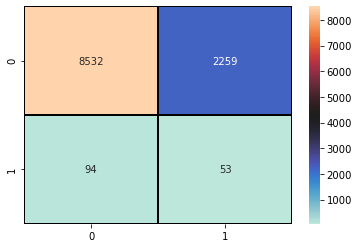

In [75]:
cm = confusion_matrix(Y_test, Y_pred)
print(sns.heatmap(cm,annot=True,fmt='g',cmap="icefire", linewidths=1, linecolor='black'))

In [76]:
print(classification_report(Y_test, Y_pred))
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     10791
           1       0.02      0.36      0.04       147

    accuracy                           0.78     10938
   macro avg       0.51      0.58      0.46     10938
weighted avg       0.98      0.78      0.87     10938

              precision    recall  f1-score   support

           0       0.68      0.79      0.73     25177
           1       0.75      0.64      0.69     25177

    accuracy                           0.71     50354
   macro avg       0.72      0.71      0.71     50354
weighted avg       0.72      0.71      0.71     50354



In [77]:
# plotting ROC curve
Y_score = logreg.predict_proba(X_test)[:,1]
false_positive_rate_lr, true_positive_rate_lr, threshold = roc_curve(Y_test, Y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, Y_score))


roc_auc_score for Logistic Regression:  0.5946067427063495


Not very good results

# Decision tree

In [78]:
max_dep=0
for i in range(1,100):
    model = DecisionTreeClassifier(max_depth=i,
                               min_samples_split=8,
                               random_state=1024)
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    if f1_score(Y_test, Y_predict)>max_dep+0.1:
        max_dep=f1_score(Y_test, Y_predict)
        tuned_depth=i
print(max_dep,tuned_depth)

0.5303370786516854 24


In [79]:
max_dep=0
for i in range(2,100):
    model = DecisionTreeClassifier(max_depth=tuned_depth,
                               min_samples_split=i,
                               random_state=1024)
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    if f1_score(Y_test, Y_predict)>max_dep+0.1:
        max_dep=f1_score(Y_test, Y_predict)
        tuned_split=i
print(max_dep,tuned_split)

0.5339366515837104 2


In [80]:
model = DecisionTreeClassifier(max_depth=tuned_depth,
                               min_samples_split=tuned_split,
                               random_state=1024)
model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=24, random_state=1024)

In [81]:
Y_predict = model.predict(X_test)
train_predict=model.predict(X_train)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_predict)))
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_train,train_predict)))

Accuracy Score is 0.98117
Accuracy Score is 0.99706


AxesSubplot(0.125,0.125;0.62x0.755)


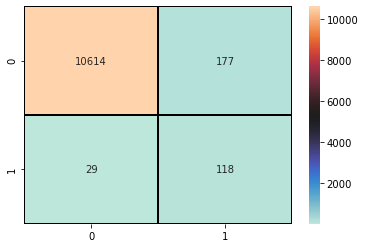

In [82]:
cm = confusion_matrix(Y_test, Y_predict)
print(sns.heatmap(cm,annot=True,fmt='g',cmap="icefire", linewidths=1, linecolor='black'))

In [83]:
print(classification_report(Y_test, Y_predict))
print(classification_report(Y_train, train_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10791
           1       0.40      0.80      0.53       147

    accuracy                           0.98     10938
   macro avg       0.70      0.89      0.76     10938
weighted avg       0.99      0.98      0.98     10938

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25177
           1       0.99      1.00      1.00     25177

    accuracy                           1.00     50354
   macro avg       1.00      1.00      1.00     50354
weighted avg       1.00      1.00      1.00     50354



In [84]:
# plotting ROC curve
Y_score = model.predict_proba(X_test)[:,1]
false_positive_rate_dt, true_positive_rate_dt, threshold = roc_curve(Y_test, Y_score)
print('roc_auc_score for DecisionTree: ', roc_auc_score(Y_test, Y_score))



roc_auc_score for DecisionTree:  0.8952834214957412


# Random Forest 

In [85]:
f1_max=0
for i in range(1,10):
    model = RandomForestClassifier(n_estimators=250,
                              max_depth=tuned_depth,
                              min_samples_leaf=i
                              )
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    if f1_score(Y_test, Y_predict)>f1_max+0.1:
        f1_max=f1_score(Y_test, Y_predict)
        tuned_leaf=i
print(f1_max,tuned_leaf)

0.7852348993288589 1


In [86]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=tuned_depth,
                              min_samples_leaf=tuned_leaf
                              )
model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=24, n_estimators=250)

In [87]:
Y_predict = model.predict(X_test)
Train_predict=model.predict(X_train)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_predict)))
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_train, Train_predict)))

Accuracy Score is 0.99433
Accuracy Score is 0.99934


<AxesSubplot:>

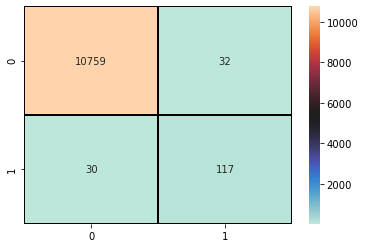

In [88]:
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm,annot=True,fmt='g',cmap="icefire", linewidths=1, linecolor='black')


In [89]:
print(classification_report(Y_test, Y_predict))
print(classification_report(Y_train, Train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10791
           1       0.79      0.80      0.79       147

    accuracy                           0.99     10938
   macro avg       0.89      0.90      0.89     10938
weighted avg       0.99      0.99      0.99     10938

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25177
           1       1.00      1.00      1.00     25177

    accuracy                           1.00     50354
   macro avg       1.00      1.00      1.00     50354
weighted avg       1.00      1.00      1.00     50354



In [90]:
# plotting ROC curve
Y_score = model.predict_proba(X_test)[:,1]
false_positive_rate_rf, true_positive_rate_rf, threshold = roc_curve(Y_test, Y_score)
print('roc_auc_score for Random Forest: ', roc_auc_score(Y_test, Y_score))


roc_auc_score for Random Forest:  0.968830790587016


# Implementing ANN

In [91]:
classifier = Sequential()
# input layer and first layer
classifier.add(Dense(units=2*30/3, kernel_initializer="uniform", activation = 'relu', input_dim = 29))
# second layer
classifier.add(Dense(units=2*21/3, kernel_initializer="uniform", activation = 'relu'))
# third layer
classifier.add(Dense(units=2*15/3, kernel_initializer="uniform", activation = 'relu'))
#output layer
classifier.add(Dense(units=1, kernel_initializer="uniform", activation = 'sigmoid'))

In [92]:
#compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
classifier.fit(X_train, Y_train, batch_size = 100, epochs = 40)

Epoch 1/40
504/504 [==============================] - 0s 768us/step - loss: 0.6386 - accuracy: 0.6242
Epoch 2/40
504/504 [==============================] - 0s 777us/step - loss: 0.4943 - accuracy: 0.7556
Epoch 3/40
504/504 [==============================] - 0s 797us/step - loss: 0.3748 - accuracy: 0.8361
Epoch 4/40
504/504 [==============================] - 0s 803us/step - loss: 0.3221 - accuracy: 0.8648
Epoch 5/40
504/504 [==============================] - 0s 828us/step - loss: 0.2866 - accuracy: 0.8843
Epoch 6/40
504/504 [==============================] - 0s 824us/step - loss: 0.2644 - accuracy: 0.8943
Epoch 7/40
504/504 [==============================] - 0s 814us/step - loss: 0.2479 - accuracy: 0.9013
Epoch 8/40
504/504 [==============================] - 0s 798us/step - loss: 0.2378 - accuracy: 0.9048
Epoch 9/40
504/504 [==============================] - 0s 838us/step - loss: 0.2307 - accuracy: 0.9074
Epoch 10/40
504/504 [==============================] - 0s 818us/step - loss: 0.223

Accuracy Score is 0.92037
Accuracy Score is 0.95119


<AxesSubplot:>

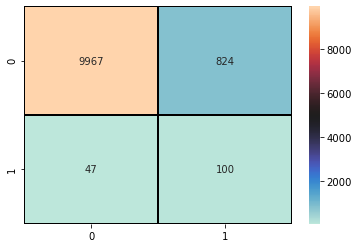

In [94]:
Y_predict = classifier.predict(X_test)
Y_predict = (Y_predict > 0.5)
Y_predict=[1 if x==True else 0 for x in Y_predict]
Y_predict_train = classifier.predict(X_train)
Y_predict_train = (Y_predict_train > 0.5)
Y_predict_train=[1 if x==True else 0 for x in Y_predict_train]

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_predict)))
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_train, Y_predict_train)))
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm,annot=True,fmt='g',cmap="icefire", linewidths=1, linecolor='black')


In [95]:
print(classification_report(Y_test, Y_predict))
print(classification_report(Y_train, Y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10791
           1       0.11      0.68      0.19       147

    accuracy                           0.92     10938
   macro avg       0.55      0.80      0.57     10938
weighted avg       0.98      0.92      0.95     10938

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     25177
           1       0.93      0.97      0.95     25177

    accuracy                           0.95     50354
   macro avg       0.95      0.95      0.95     50354
weighted avg       0.95      0.95      0.95     50354



In [96]:
# for plotting ROC curve
y_pred_keras = classifier.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)

# AdaBoost

In [97]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=tuned_depth),
    n_estimators=200
)
classifier.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=24),
                   n_estimators=200)

In [98]:
Y_predict = classifier.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_predict)))
Y_predict_train = classifier.predict(X_train)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_train, Y_predict_train)))

Accuracy Score is 0.99598
Accuracy Score is 1.0


<AxesSubplot:>

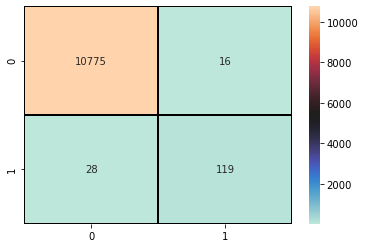

In [99]:
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm,annot=True,fmt='g',cmap="icefire", linewidths=1, linecolor='black')


In [100]:
print(classification_report(Y_test, Y_predict))
print(classification_report(Y_train, Y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10791
           1       0.88      0.81      0.84       147

    accuracy                           1.00     10938
   macro avg       0.94      0.90      0.92     10938
weighted avg       1.00      1.00      1.00     10938

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25177
           1       1.00      1.00      1.00     25177

    accuracy                           1.00     50354
   macro avg       1.00      1.00      1.00     50354
weighted avg       1.00      1.00      1.00     50354



In [101]:
# plotting ROC curve
Y_score = classifier.predict_proba(X_test)[:,1]
false_positive_rate_ab, true_positive_rate_ab, threshold = roc_curve(Y_test, Y_score)
print('roc_auc_score for Adaboost: ', roc_auc_score(Y_test, Y_score))

roc_auc_score for Adaboost:  0.9775493183094756


# Comparing Models using ROC curves

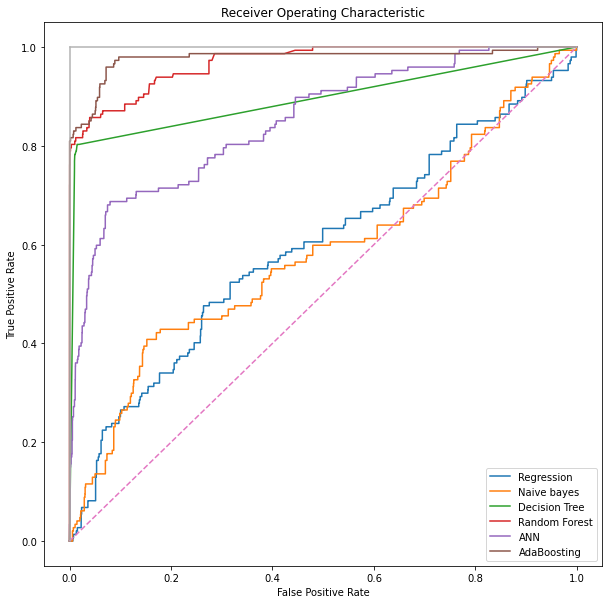

In [102]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lr, true_positive_rate_lr, label = "Regression")
plt.plot(false_positive_rate_nbc, true_positive_rate_nbc, label = "Naive bayes")
plt.plot(false_positive_rate_dt, true_positive_rate_dt,label = "Decision Tree")
plt.plot(false_positive_rate_rf, true_positive_rate_rf,label = "Random Forest")
plt.plot(fpr_keras, tpr_keras,label = "ANN")
plt.plot(false_positive_rate_ab, true_positive_rate_ab,label = "AdaBoosting")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

   # Thank you